
# ASSIGNED A constrained minimization



**This is a quiz. You may not talk during the quiz except to ask an instructor a question. You are not allowed to look at other people's work. By turning this in, you agree that you did not cheat and that this work is only your own. You may not modify your quiz after the due time without permission.**

Given the equation $f(y) = y_{1}^2 - 4 y_{1}  + \frac{3}{2} y_{2}^2 - 7 y_{2} + y_{1} y_{2} + 8 - \ln(y_{1}) - \ln(y_{2})$ with $y_{1} > 0$ and $y_{2} > 0$, perform the following analyses:

Generate a contour plot for $f(y)$ that shows where the minimum is. State in words where the approximate minimum is.



Find the minimum (any way you want).



Show quantitative evidence that your solution is a minimum.




## solution



Here is a way to make a contour plot.



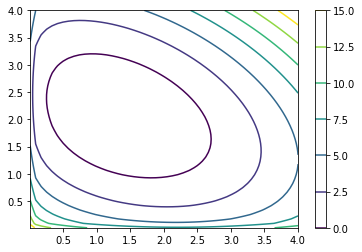

In [1]:
import numpy as np

def f(y):
    y1, y2 = y
    return y1**2 - 4 * y1 + 3 / 2 * y2**2 - 7 * \
        y2 + y1 * y2 + 8 - np.log(y1) - np.log(y2)


y1 = np.linspace(0.01, 4)
y2 = np.linspace(0.01, 4)
Y1, Y2 = np.meshgrid(y1, y2)

F= f(np.array([Y1, Y2]))

%matplotlib inline
import matplotlib.pyplot as plt
plt.contour(Y1, Y2, F)
plt.colorbar()

Based on this, we can see that there is a minimum near (1.5, 2.0).



In [1]:
from scipy.optimize import minimize

sol = minimize(f, [1.5, 2.0])
sol

fun: -1.8742240831673438
 hess_inv: array([[ 0.45608477, -0.13781933],
       [-0.13781933,  0.35075638]])
      jac: array([ -9.84966755e-06,  -3.62098217e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 3
     njev: 6
   status: 0
  success: True
        x: array([ 1.34754467,  2.04699125])

To prove this is a minimum, we note that the sol.jac (jacobian) is close to zero, so that means we are at a stationary point. To prove we are at a minimum though, we must show the hessian is positive definite. We can do that by showing the inverse of the inverse hessian (which is the hessian) has all positive eigenvalues.



In [1]:
np.linalg.eigvals(np.linalg.inv(sol.hess_inv))

array([ 1.81501599,  3.90805409])

This proves we are at a minimum (provided the approximate inverse hessian is accurate). A better approach is to use a tool like autograd to compute an exact hessian.

